# **EV Charging Utilization Rate**

<ipython-input-7-26d9d182e404>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


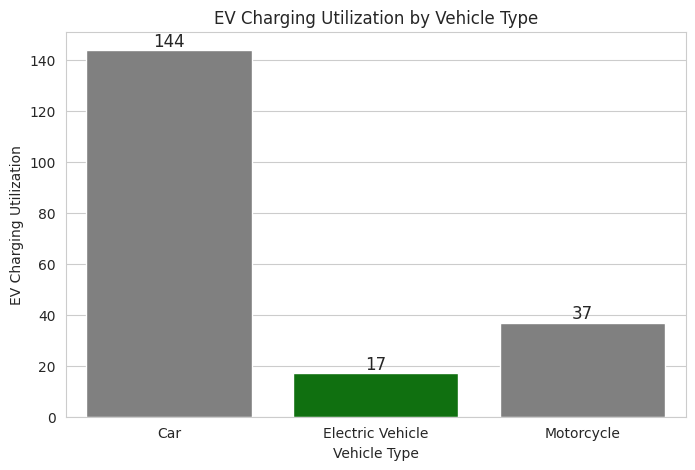

EV Charging Utilization Rate: 34.00%


In [7]:
# Install required libraries (Uncomment if not installed)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Colab
df = pd.read_csv('/content/Processed_Parking_Data.csv')

# Convert 'Electric_Vehicle' column to numeric (1 = EV, 0 = Non-EV)
df['Electric_Vehicle'] = df['Electric_Vehicle'].apply(lambda x: 1 if x in ['Yes', 1] else 0)

# Count EV utilization only for Electric Vehicles
ev_utilization = df[df['Vehicle_Type'] == 'Electric Vehicle']['Electric_Vehicle'].sum()

# Group data for all vehicle types
vehicle_counts = df.groupby('Vehicle_Type')['Electric_Vehicle'].sum().reset_index()

# Rename columns for clarity
vehicle_counts.columns = ['Vehicle_Type', 'EV_Charging_Utilization']

# Set seaborn style
sns.set_style("whitegrid")

# Define custom color mapping
color_map = {
    'Electric Vehicle': 'green',  # EV utilization in green
    'Motorcycle': 'gray',
    'Car': 'gray'
}

# Plot bar chart with custom colors
plt.figure(figsize=(8, 5))
bars = sns.barplot(
    x='Vehicle_Type',
    y='EV_Charging_Utilization',
    data=vehicle_counts,
    palette=color_map
)

# Labels and title
plt.xlabel("Vehicle Type")
plt.ylabel("EV Charging Utilization")
plt.title("EV Charging Utilization by Vehicle Type")

# Show values on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=12)

# Show plot
plt.show()

# Calculate EV Charging Utilization Rate (Assuming 50 total EV charging slots)
total_ev_slots = 50
ev_utilization_rate = (ev_utilization / total_ev_slots) * 100

# Print EV utilization percentage
print(f"EV Charging Utilization Rate: {ev_utilization_rate:.2f}%")
